In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [2]:
# import du fichier préalablement nettoyé
# pour mémoire, l'année 2020 n'est pas présente dans le dataset
#energy=pd.read_csv('dataset_energie_clean_cyril.csv')
energy=pd.read_csv('./dataset/ENERGIE.csv')
energy.head(1)

Unnamed: 0  index  Code INSEE région                Région    An  Mois  \
0           0     18                 84  Auvergne-Rhône-Alpes  2013     1   

   Jour        Date  Heure               Date - Heure  Consommation (MW)  \
0     1  2013-01-01  00:30  2013-01-01T00:30:00+01:00             8173.0   

   Thermique (MW)  Nucléaire (MW)  Eolien (MW)  Solaire (MW)  \
0           252.0         12069.0        257.0           0.0   

   Hydraulique (MW)  Pompage (MW)  Bioénergies (MW)  Ech. physiques (MW)  
0            3079.0          -4.0              68.0              -7551.0

In [3]:
energy.drop(['Unnamed: 0', 'Code INSEE région', 'index'], axis=1, inplace=True)

In [4]:
energy.head(1)

Région    An  Mois  Jour        Date  Heure  \
0  Auvergne-Rhône-Alpes  2013     1     1  2013-01-01  00:30   

                Date - Heure  Consommation (MW)  Thermique (MW)  \
0  2013-01-01T00:30:00+01:00             8173.0           252.0   

   Nucléaire (MW)  Eolien (MW)  Solaire (MW)  Hydraulique (MW)  Pompage (MW)  \
0         12069.0        257.0           0.0            3079.0          -4.0   

   Bioénergies (MW)  Ech. physiques (MW)  
0              68.0              -7551.0

In [5]:
energy.columns

Index(['Région', 'An', 'Mois', 'Jour', 'Date', 'Heure', 'Date - Heure',
       'Consommation (MW)', 'Thermique (MW)', 'Nucléaire (MW)', 'Eolien (MW)',
       'Solaire (MW)', 'Hydraulique (MW)', 'Pompage (MW)', 'Bioénergies (MW)',
       'Ech. physiques (MW)'],
      dtype='object')

### Données temporelles
Ajout de la colonne du total pour l'énergie produite, ainsi que le total concernant les énergies renouvelables 
(Eolienne, Hydraulique, Solaire, Bioénergies)

In [6]:
energy['Conso hors Pompage']=energy['Consommation (MW)']+energy['Pompage (MW)']
energy['Hydr hors Pompage']=energy['Hydraulique (MW)']+energy['Pompage (MW)']
energy['Renouvelable Totale']=energy['Eolien (MW)']+energy['Solaire (MW)']+energy['Hydraulique (MW)']+energy['Bioénergies (MW)']
energy['Ren Totale hors Pompage']=energy['Renouvelable Totale']+energy['Pompage (MW)']
energy['Prod Totale']=energy['Thermique (MW)']+energy['Nucléaire (MW)']+energy['Eolien (MW)']+energy['Solaire (MW)']+energy['Hydraulique (MW)']+energy['Bioénergies (MW)']
energy['Prod Totale hors Pompage']=energy['Prod Totale']+energy['Pompage (MW)']

In [7]:
energy['Date']=pd.to_datetime(energy['Date'], yearfirst = True)
energy['Date']=energy['Date'].dt.date

In [8]:
energy.describe()

An          Mois          Jour  Consommation (MW)  \
count  1.858164e+06  1.858164e+06  1.858164e+06       1.858164e+06   
mean   2.016925e+03  6.429049e+00  1.572824e+01       4.470366e+03   
std    2.546266e+00  3.410893e+00  8.799478e+00       2.160692e+03   
min    2.013000e+03  1.000000e+00  1.000000e+00       8.950000e+02   
25%    2.015000e+03  3.000000e+00  8.000000e+00       2.767000e+03   
50%    2.017000e+03  6.000000e+00  1.600000e+01       4.091000e+03   
75%    2.019000e+03  9.000000e+00  2.300000e+01       5.704000e+03   
max    2.021000e+03  1.200000e+01  3.100000e+01       1.533800e+04   

       Thermique (MW)  Nucléaire (MW)   Eolien (MW)  Solaire (MW)  \
count    1.858164e+06    1.858164e+06  1.858164e+06  1.858164e+06   
mean     3.673065e+02    3.663898e+03  2.471475e+02  8.914743e+01   
std      5.329596e+02    3.865435e+03  4.142289e+02  2.169327e+02   
min     -8.300000e+01   -1.440000e+02 -6.000000e+00 -2.300000e+01   
25%      2.300000e+01    0.000000e+00  2.600000e+01  0.000000e+00   
50%      1.470000e+02    2.579000e+03  1.020000e+02  0.000000e+00   
75%      4.640000e+02    6.853000e+03  2.900000e+02  6.500000e+01   
max      4.293000e+03    1.363200e+04  4.610000e+03  2.458000e+03   

       Hydraulique (MW)  Pompage (MW)  Bioénergies (MW)  Ech. physiques (MW)  \
count      1.858164e+06  1.858164e+06      1.858164e+06         1.858164e+06   
mean       6.032538e+02 -6.523427e+01      8.239493e+01        -5.177867e+02   
std        1.034297e+03  2.412953e+02      4.461180e+01         4.357817e+03   
min       -6.000000e+00 -2.570000e+03      4.000000e+00        -1.221900e+04   
25%        4.000000e+00 -1.000000e+00      4.700000e+01        -4.298000e+03   
50%        5.700000e+01  0.000000e+00      7.300000e+01         4.870000e+02   
75%        8.880000e+02  0.000000e+00      1.150000e+02         2.218000e+03   
max        8.742000e+03  0.000000e+00      5.480000e+02         1.395900e+04   

       Conso hors Pompage  Hydr hors Pompage  Renouvelable Totale  \
count        1.858164e+06       1.858164e+06         1.858164e+06   
mean         4.405132e+03       5.380196e+02         1.021944e+03   
std          2.139141e+03       9.923785e+02         1.153477e+03   
min          8.950000e+02      -1.505000e+03         1.700000e+01   
25%          2.722000e+03       3.000000e+00         2.000000e+02   
50%          4.026000e+03       4.200000e+01         5.110000e+02   
75%          5.596000e+03       7.550000e+02         1.495000e+03   
max          1.533800e+04       8.738000e+03         9.124000e+03   

       Ren Totale hors Pompage   Prod Totale  Prod Totale hors Pompage  
count             1.858164e+06  1.858164e+06              1.858164e+06  
mean              9.567094e+02  5.053149e+03              4.987914e+03  
std               1.113858e+03  4.559377e+03              4.504560e+03  
min              -1.280000e+03 -5.000000e+00             -4.600000e+02  
25%               1.940000e+02  6.370000e+02              6.330000e+02  
50%               4.720000e+02  4.317000e+03              4.259000e+03  
75%               1.371000e+03  8.076000e+03              8.034000e+03  
max               9.120000e+03  2.214600e+04              2.213600e+04

### Analyse au niveau national de la puissance

In [9]:
df = energy.groupby(['Région', 'Date', 'An', 'Mois', 'Jour']).mean()
df = df.reset_index()
df.head(1)

Région        Date    An  Mois  Jour  Consommation (MW)  \
0  Auvergne-Rhône-Alpes  2013-01-01  2013     1     1        7560.829787   

   Thermique (MW)  Nucléaire (MW)  Eolien (MW)  Solaire (MW)  \
0      251.510638    11577.021277   118.893617      5.021277   

   Hydraulique (MW)  Pompage (MW)  Bioénergies (MW)  Ech. physiques (MW)  \
0       2743.914894        -755.0         64.914894         -6449.340426   

   Conso hors Pompage  Hydr hors Pompage  Renouvelable Totale  \
0         6805.829787        1988.914894          2932.744681   

   Ren Totale hors Pompage   Prod Totale  Prod Totale hors Pompage  
0              2177.744681  14761.276596              14006.276596

In [10]:
df = df.groupby(['Date', 'An', 'Mois', 'Jour']).sum()
df = df.reset_index()
df.head(1)

Date    An  Mois  Jour  Consommation (MW)  Thermique (MW)  \
0  2013-01-01  2013     1     1       54395.638298     3667.489362   

   Nucléaire (MW)  Eolien (MW)  Solaire (MW)  Hydraulique (MW)  Pompage (MW)  \
0    49431.382979  2584.808511    119.829787        6805.87234  -1401.425532   

   Bioénergies (MW)  Ech. physiques (MW)  Conso hors Pompage  \
0        718.319149         -7567.914894        52994.212766   

   Hydr hors Pompage  Renouvelable Totale  Ren Totale hors Pompage  \
0        5404.446809         10228.829787              8827.404255   

    Prod Totale  Prod Totale hors Pompage  
0  63327.702128              61926.276596

In [11]:
df.describe()

An         Mois         Jour  Consommation (MW)  \
count  3226.000000  3226.000000  3226.000000        3226.000000   
mean   2016.924985     6.429014    15.728146       53644.398446   
std       2.546671     3.411437     8.800891       10841.227088   
min    2013.000000     1.000000     1.000000       35502.375000   
25%    2015.000000     3.000000     8.000000       45791.473958   
50%    2017.000000     6.000000    16.000000       50017.250000   
75%    2019.000000     9.000000    23.000000       62004.010417   
max    2021.000000    12.000000    31.000000       89599.750000   

       Thermique (MW)  Nucléaire (MW)   Eolien (MW)  Solaire (MW)  \
count     3226.000000     3226.000000   3226.000000   3226.000000   
mean      4407.672902    43966.815925   2965.767474   1069.763012   
std       2933.949007     6881.420571   2301.427817    639.298427   
min        424.104167    22142.708333    148.416667     50.416667   
25%       2069.161458    39334.005208   1311.848958    553.145833   
50%       3744.822917    42991.000000   2233.010417    934.166667   
75%       6456.796875    48663.588542   3891.098958   1485.255208   
max      14465.791667    60842.791667  13574.875000   3141.270833   

       Hydraulique (MW)  Pompage (MW)  Bioénergies (MW)  Ech. physiques (MW)  \
count       3226.000000   3226.000000       3226.000000          3226.000000   
mean        7239.043183   -782.815293        988.737428         -6213.449595   
std         2220.657987    400.088811        152.045186          3613.866670   
min         2098.791667  -2343.270833        519.208333        -14833.979167   
25%         5436.213542   -964.223958        898.468750         -8794.437500   
50%         7272.218750   -673.541667       1027.604167         -6657.895833   
75%         8945.875000   -509.187500       1105.562500         -4177.802083   
max        13298.458333    -62.187500       1330.354167          6197.187500   

       Conso hors Pompage  Hydr hors Pompage  Renouvelable Totale  \
count         3226.000000        3226.000000          3226.000000   
mean         52861.583154        6456.227891         12263.311098   
std          10913.839924        2335.997598          3182.090702   
min          33873.187500         279.291667          5159.875000   
25%          45132.968750        4680.265625          9927.942708   
50%          49323.416667        6454.781250         12009.802083   
75%          61164.651042        8245.505208         14126.375000   
max          89522.104167       12828.812500         24030.541667   

       Ren Totale hors Pompage   Prod Totale  Prod Totale hors Pompage  
count              3226.000000   3226.000000               3226.000000  
mean              11480.495805  60637.799924              59854.984632  
std                3214.847163   9772.576193               9820.444322  
min                3890.125000  38138.270833              37049.770833  
25%                9160.546875  53334.296875              52625.088542  
50%               11271.822917  58081.593750              57337.218750  
75%               13373.807292  68389.140625              67394.729167  
max               23305.520833  87731.645833              87167.791667

### Dispersion de la consommation et relation avec la production

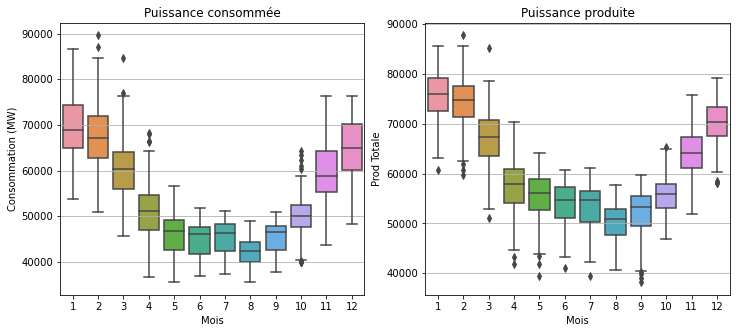

In [12]:
fig0, graf0 = plt.subplots(1,2, figsize=(12, 5))

graf0[0].set_title('Puissance consommée')
graf0[1].set_title('Puissance produite')
#graf0[2].set_title('Puissance filière renouvelable')
graf0[0].grid()
graf0[1].grid()
#graf0[2].grid()

sns.boxplot(data=df, x='Mois', y='Consommation (MW)', ax=graf0[0])
sns.boxplot(data=df, x='Mois', y='Prod Totale', ax=graf0[1]);
#sns.boxplot(data=df, x='Mois', y='Renouvelable Totale', ax=graf0[2]);
plt.savefig('./png/viz_dispersion_consommation_production.png')

Sans surprise, on observe **une demande de puissance supérieure en hiver**, de fin Octobre à mi Avril environ.
En été, la puissance consommée est en moyenne de 55 000 MW, et d'environ 70 000 en hiver.
Le chauffage représent une hausse conséquence de près de 30%.

On remarque également que **la variabilité est également plus important sur les mois d'hiver**. Ceci est le fait 
de la combinaison de 2 facteurs : d'une part la très grande variabilité de la composante météorologique (en décembre, un journaliste spécialisé de la question nucléaire indiquait sur BFM TV que 1° de température en moins nécessite 2 400 MV en plus), d'autre part la volumétrie de cette part de la consommation qui applique un effet de levier sur les fluctuations
de température.

Sur le 3ème graphique, on constate que **la disponibilité des énergies renouvelables est plus stable d'un mois sur l'autre**, avec malgré tout, un phénomène d'épuisement à la sortie de l'été. On peut noter sur cette figure que
la variabilité mensuelle n'est pas neutre, ce qui est cohérent avec la fluctuation des éléments naturels qui les génèrent
(vent, pluie, soleil principalement). Un point remarquable est **la présence de nombreux outliers** à la hausse.
Ils témoignent de phénomènes naturels particulièrement intenses qui ont des impacts énergétiques positifs non néglieables.

On peut estimer que **le 'schéma' énergétique est relativement reproductible** d'une année sur l'autre.

### Répartition des sources d'énergie

In [13]:
repartition = df.groupby(['An','Mois']).mean()
repartition = repartition.reset_index()
repartition = repartition.groupby('Mois').mean()
repartition = repartition.reset_index()
repartition['part_ther'] = [i / j *100 for i, j in zip(repartition['Thermique (MW)'], repartition['Prod Totale'])]
repartition['part_nucl'] = [i / j *100 for i, j in zip(repartition['Nucléaire (MW)'], repartition['Prod Totale'])]
repartition['part_reno'] = [i / j *100 for i, j in zip(repartition['Renouvelable Totale'], repartition['Prod Totale'])]
repartition['part_sol'] = [i / j *100 for i, j in zip(repartition['Solaire (MW)'], repartition['Renouvelable Totale'])]
repartition['part_eol'] = [i / j *100 for i, j in zip(repartition['Eolien (MW)'], repartition['Renouvelable Totale'])]
repartition['part_hyd'] = [i / j *100 for i, j in zip(repartition['Hydraulique (MW)'], repartition['Renouvelable Totale'])]
repartition['part_bio'] = [i / j *100 for i, j in zip(repartition['Bioénergies (MW)'], repartition['Renouvelable Totale'])]

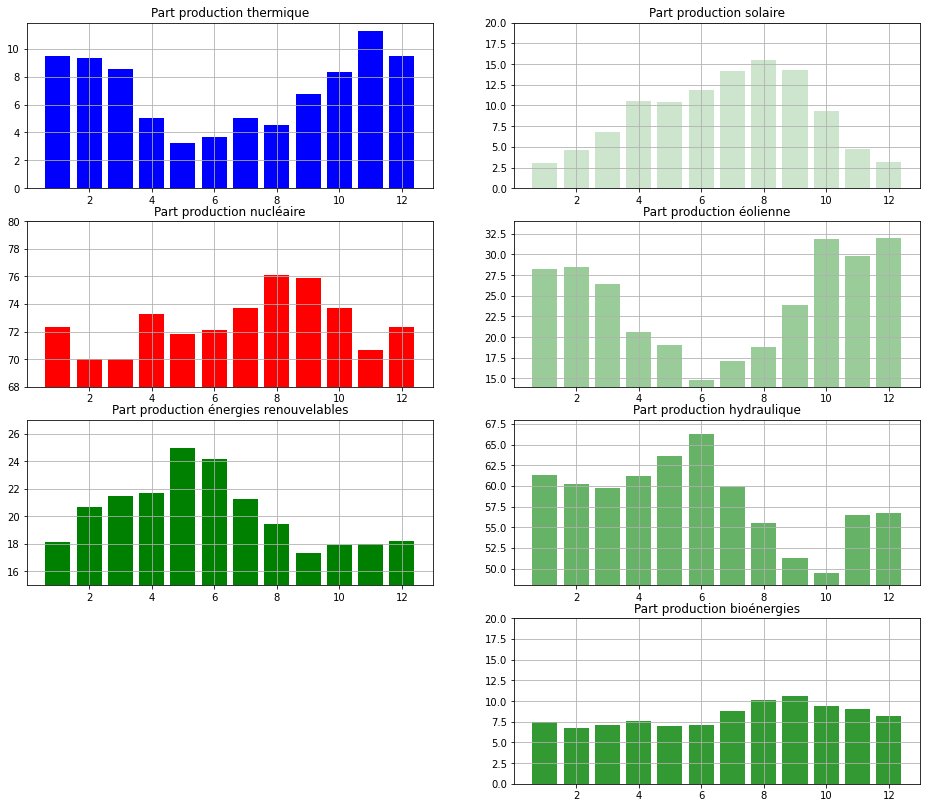

In [14]:
fig1 = plt.figure(figsize=(16,14))
plt.subplot(4,2,1)
plt.grid()
plt.title('Part production thermique')
plt.bar(repartition['Mois'], repartition['part_ther'], color='blue')
plt.subplot(4,2,3)
plt.grid()
plt.title('Part production nucléaire')
plt.ylim([68,80])
plt.bar(repartition['Mois'], repartition['part_nucl'], color='red')
plt.subplot(4,2,5)
plt.grid()
plt.title('Part production énergies renouvelables')
plt.ylim([15,27])
plt.bar(repartition['Mois'], repartition['part_reno'], color='green')

plt.subplot(4,2,2)
plt.grid()
plt.title('Part production solaire')
plt.ylim([0,20])
plt.bar(repartition['Mois'], repartition['part_sol'], color='green', alpha=0.2)
plt.subplot(4,2,4)
plt.grid()
plt.title('Part production éolienne')
plt.ylim([14,34])
plt.bar(repartition['Mois'], repartition['part_eol'], color='green', alpha=0.4)
plt.subplot(4,2,6)
plt.grid()
plt.title('Part production hydraulique')
plt.ylim([48,68])
plt.bar(repartition['Mois'], repartition['part_hyd'], color='green', alpha=0.6)
plt.subplot(4,2,8)
plt.grid()
plt.title('Part production bioénergies')
plt.ylim([0,20])
plt.bar(repartition['Mois'], repartition['part_bio'], color='green', alpha=0.8)
plt.savefig('./png/viz_repartition_filieres.png');

Sur les figures de gauche (les échelles sont comparables), on peut observer une amplitude légèrement supérieure pour **la filière thermique qui semble être la variable d'ajustement**. On peut imaginer que cette filière a moins d'inertie de mise en route.

On perçoit également la stratégie de recours aux différentes sources d'énergies. Les énergies renouvelables, pour une capacité installée, dépendent de conditions météorologiques. **Les ressources naturelles une donnée d'entrée faiblement contrôlable**.

**Ces stratégie dépendent probablement également des prix de revient** de chaque énergie pendant le cycle annuel pour mieux.

On constate qu'à la fin du printemps et au début de l'été, **le pic sur les énergies renouvelable permet de générer un creux pour la production d'énergie thermique**.

En revanche, **à la sortie de l'été, la forte baisse constatée sur les énergies renouvelables est compensée par l'énergie nucléaire** plutôt que par l'énergie thermique.

On visualise également très bien **le cycle des énergies renouvelables** avec une forte progression tout au long du premier semestre. Elle semble logique, en corrélation avec la fonde des neiges, les pluies du printemps ainsi que  le temps d'ensoleillement qui augmente.

**Ces ressources sont rapidement consommées tout au long de l'été et peinent à se reconstituer avant le cycle annuel suivant**.

Les figures de droite (les échelles sont comparables) montrent comment ces énergies se comportent en moyenne sur l'année. Hormis les bioénergies, elles sont très disparates d'un mois sur l'autre.

**L'énergie solaire est très faible en hiver. On remarque en revanche qu'elle continue de progresser après le solstice d'été du mois de Juin**. On peut estimer que la durée d'ensoleillement n'est pas le seul facteur influant. D'autres doivent être considérés comme peut-être l'inclinaison des rayons et la couverture nuageuse.

Il est également intéressant de visualiser que **l'énergie éolienne n'est pas aléatoire** comme on pourrait le présupposer. Le vent semble être une composante dépendant de la présence ou non de courants froids sur le pays. Plus précisément, il semble que ce soit plutôt au moment de la transition où les courants chauds existent et les courant froids apparaissent, plutôt que l'inverse.

**La production hydraulique est forte et plutôt régulière sur le premier semestre** en moyenne

### Dispersion des différentes sources d'énergie

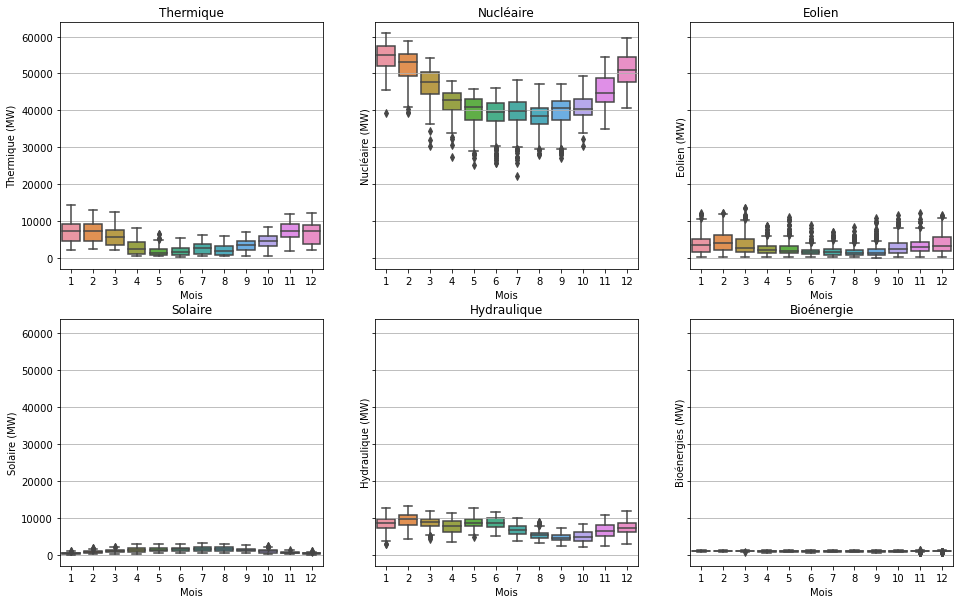

In [15]:
fig2, graf2 = plt.subplots(2,3, figsize=(16, 10), sharey=True)

graf2[0,0].set_title('Thermique')
graf2[0,1].set_title('Nucléaire')
graf2[0,2].set_title('Eolien')
graf2[1,0].set_title('Solaire')
graf2[1,1].set_title('Hydraulique')
graf2[1,2].set_title('Bioénergie')
graf2[0,0].grid()
graf2[0,1].grid()
graf2[0,2].grid()
graf2[1,0].grid()
graf2[1,1].grid()
graf2[1,2].grid()

sns.boxplot(data=df, x='Mois', y='Thermique (MW)', ax=graf2[0,0])
sns.boxplot(data=df, x='Mois', y='Nucléaire (MW)', ax=graf2[0,1])
sns.boxplot(data=df, x='Mois', y='Eolien (MW)', ax=graf2[0,2])
sns.boxplot(data=df, x='Mois', y='Solaire (MW)', ax=graf2[1,0])
sns.boxplot(data=df, x='Mois', y='Hydraulique (MW)', ax=graf2[1,1])
sns.boxplot(data=df, x='Mois', y='Bioénergies (MW)', ax=graf2[1,2])
plt.savefig('./png/viz_dispersion_filieres.png');

A l'échelle de la production national, les variations d'une année sur l'autre pour les bioénergies sont négligeables.

Les variations de l'énergie solaire sont sensibles pour les mois d'Avril à Août (quartile supérieur légèrement décroché).

Les variations sur l'énergie hydraulique sont impactantes, avec une dispersion supérieure hors été qui reste relativement prévisible.

L'énergie éolienne présente de nombreux événements imprévisibles qui représentent des opportunités en terme de production d'énergie, parfois, très importantes.

Le recours à l'énergie thermique à une variabilité significative en hiver puis à l'automne. Il y a un risque de dérive à la hausse relativement élevé en hiver alors qu'en automne, on trouve plutôt des opportunités à la baisse.

Le graphique concernant l'énergie nucléaire est plus difficile à interpréter. La variabilité est relativement importante d'une année sur l'autre, voir très importante si on considère l'ensemble de l'étendue. Il y a également des outliers à la baisse, mais jamais après Septembre. Ces coupures ne peuvent être le fait des productions exceptionnelles sur les autres filières. On pourra **vérifier la corrélation entre l'énergie nucléaire et la consommation (?)**.

### Corrélation en entre consommation et sources d'énergie

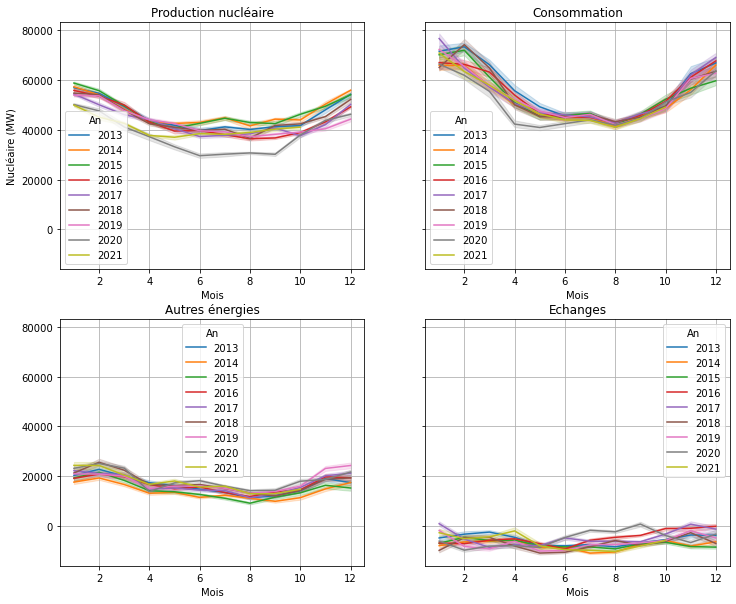

In [16]:
fig3, graf3 = plt.subplots(2,2, figsize=(12, 10), sharey=True)
graf3[0,0].set_title('Production nucléaire')
graf3[0,1].set_title('Consommation')
graf3[1,0].set_title('Autres énergies')
graf3[1,1].set_title('Echanges')
graf3[0,0].grid()
graf3[0,1].grid()
graf3[1,0].grid()
graf3[1,1].grid()

sns.lineplot(data=df, x='Mois', y='Nucléaire (MW)', hue='An', palette='tab10', ax=graf3[0,0])
sns.lineplot(data=df, x='Mois', y='Consommation (MW)', hue='An', palette='tab10', ax=graf3[0,1])
sns.lineplot(data=df, x='Mois', y=df['Prod Totale']-df['Nucléaire (MW)'], hue='An', palette='tab10', ax=graf3[1,0])
sns.lineplot(data=df, x='Mois', y='Ech. physiques (MW)', hue='An', palette='tab10', ax=graf3[1,1]);

Sur la figure en haut à gauche, on retrouve la production nucléaire année par année avec une année 2021 très en deça des autres années sur l'ensemble du premier semestre. Les outliers soulignés plus haut correspondent certainement à cette année 2021.

On n'observe finalement pas de corrélation avec la consommation (figure de droite) pour justifier cet écart.

En bas à gauche, on ne peut dire non plus que l'ensemble des autres sources d'énergie compensent cette démarcation de 2021 sur l'énergie nucléaire.

En regardant du côté des échanges avec l'extérieur, on distingue un moins d'énergie vendue sur le premier semestre. On pourrait alors vérifier une dépendance avec le prix des énergies sur cette période "mouvementée" sur le marché des matières premières qui pourrait expliquer ce choix.

### Comparaisons annuelles

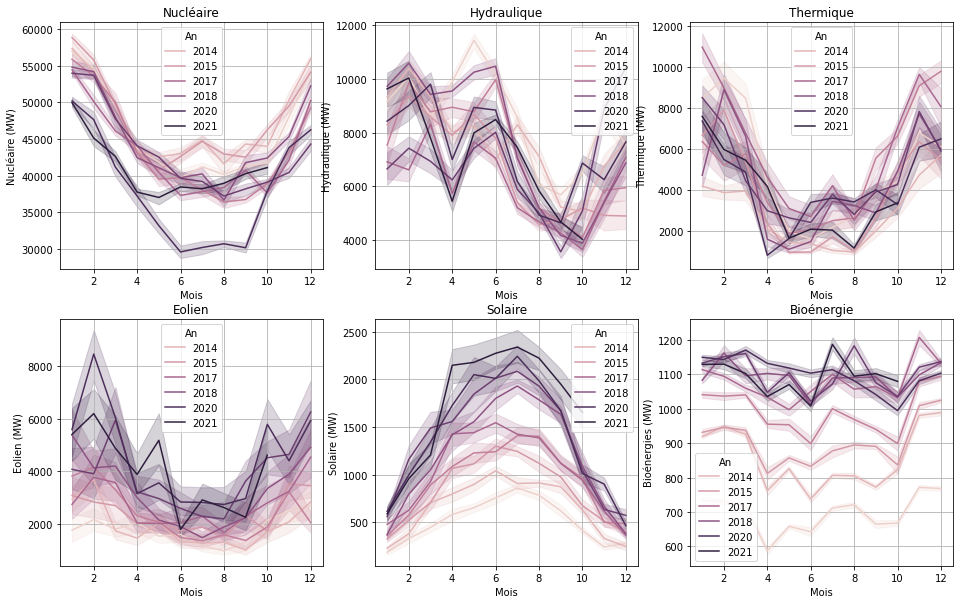

In [17]:
fig4, graf4 = plt.subplots(2,3, figsize=(16, 10))

graf4[0,0].set_title('Nucléaire')
graf4[0,1].set_title('Hydraulique')
graf4[0,2].set_title('Thermique')
graf4[1,0].set_title('Eolien')
graf4[1,1].set_title('Solaire')
graf4[1,2].set_title('Bioénergie')
graf4[0,0].grid()
graf4[0,1].grid()
graf4[0,2].grid()
graf4[1,0].grid()
graf4[1,1].grid()
graf4[1,2].grid()

sns.lineplot(data=df, x='Mois', y='Nucléaire (MW)', hue='An', ax=graf4[0,0])
sns.lineplot(data=df, x='Mois', y='Hydraulique (MW)', hue='An', ax=graf4[0,1])
sns.lineplot(data=df, x='Mois', y='Thermique (MW)', hue='An', ax=graf4[0,2])
sns.lineplot(data=df, x='Mois', y='Eolien (MW)', hue='An', ax=graf4[1,0])
sns.lineplot(data=df, x='Mois', y='Solaire (MW)', hue='An', ax=graf4[1,1])
sns.lineplot(data=df, x='Mois', y='Bioénergies (MW)', hue='An', ax=graf4[1,2])
plt.savefig('./png/viz_evolution_filieres.png');

De 2013 à 2021, on observe très nettement **le développement des énergies renouvelables**.

**L'énergie solaire est en constante progression (200%)**. Elle pourra être mise en parallèle du développement de la surface de panneaux solaires.

Après avoir fortement progressé (100%), **les bioénergies semblent avoir atteint une limite depuis 5 ans**.

**L'énergie hydraulique a un patterne identique d'une année sur l'autre**, en 3 phases. Un premier semestre fort mais cahotique. Un point bas quasi identique toutes les années à la sortie de l'été et une remontée soutenue à l'autome. Le premier semestre doit laisser entrevoir les années de "sécheresse" avec un plateau autour de 350 000 MW. Une année "normale" se situerait autour de 450 000 MW.

L'énergie éolienne présente un profil similaire avec une première phase d'instabilité moins longue, un été également plutôt calme. **La capacité a également doublé (100% de progression environ) et continue de progresser**.

**L'énergie thermique présente un schéma plutôt répétable, sans grande surprise**. A noter toutefois que ce profil peut être amené à évoluer du fait des nouvelles contraintes environnementale qui incitent les entreprises à investir dans des filières énergétiques sans carbone. Les premiers effets devraient se faire sentir dès 2022.

**Les courbes de l'énergie nucléaire sont également prédictibles d'une année à l'autre**. Le seul écart notable concerne le premier trimestre de l'année 2021, période pendant laquelle la France observait une période confinement qui ne pouvait être sans incidence sur la consommation d'énergie (transport, activité industrielle).

La puissance nucléaire étant la source principale d'énergie en France (plus de 70%), il apparait judicieux de vérifier l'impact de ces baisses de capacité sur la balance énergétique de la France et donc le risque de Black-Out. Dans ce contexte, la France perd son autonomie et dépend de la disponibilité des ressources pouvant être importées.

### Balance énergie en France avec risque de Black-Out

In [18]:
black_out = energy

In [19]:
black_out = black_out.groupby(['An', 'Mois', 'Jour', 'Heure', 'Date - Heure']).sum()

In [20]:
black_out = black_out.reset_index()

In [21]:
black_out

An  Mois  Jour  Heure               Date - Heure  Consommation (MW)  \
0       2013     1     1  00:30  2013-01-01T00:30:00+01:00            59662.0   
1       2013     1     1  01:00  2013-01-01T01:00:00+01:00            57866.0   
2       2013     1     1  01:30  2013-01-01T01:30:00+01:00            57747.0   
3       2013     1     1  02:00  2013-01-01T02:00:00+01:00            57234.0   
4       2013     1     1  02:30  2013-01-01T02:30:00+01:00            56649.0   
...      ...   ...   ...    ...                        ...                ...   
154842  2021    10    31  21:30  2021-10-31T21:30:00+01:00            46145.0   
154843  2021    10    31  22:00  2021-10-31T22:00:00+01:00            45445.0   
154844  2021    10    31  22:30  2021-10-31T22:30:00+01:00            45995.0   
154845  2021    10    31  23:00  2021-10-31T23:00:00+01:00            48093.0   
154846  2021    10    31  23:30  2021-10-31T23:30:00+01:00            47756.0   

        Thermique (MW)  Nucléaire (MW)  Eolien (MW)  Solaire (MW)  \
0               3882.0         50480.0       4170.0           0.0   
1               3661.0         50064.0       4036.0           0.0   
2               3672.0         50419.0       3960.0           0.0   
3               3661.0         50241.0       3898.0           0.0   
4               3654.0         49887.0       3815.0           0.0   
...                ...             ...          ...           ...   
154842          1557.0         39310.0       8711.0           1.0   
154843          1585.0         39002.0       8743.0           1.0   
154844          1610.0         39336.0       8615.0           1.0   
154845          1638.0         39730.0       8646.0           1.0   
154846          1654.0         38707.0       8963.0           1.0   

        Hydraulique (MW)  Pompage (MW)  Bioénergies (MW)  Ech. physiques (MW)  \
0                 7517.0         -18.0             760.0              -7161.0   
1                 7126.0        -930.0             751.0              -6877.0   
2                 6695.0        -976.0             752.0              -6810.0   
3                 6376.0        -978.0             758.0              -6758.0   
4                 6140.0       -1056.0             753.0              -6577.0   
...                  ...           ...               ...                  ...   
154842            3450.0        -909.0            1201.0              -7178.0   
154843            3371.0       -1555.0            1197.0              -6901.0   
154844            3377.0       -1837.0            1192.0              -6300.0   
154845            3533.0       -1220.0            1200.0              -5437.0   
154846            2911.0       -1636.0            1182.0              -4023.0   

        Conso hors Pompage  Hydr hors Pompage  Renouvelable Totale  \
0                  59644.0             7499.0              12447.0   
1                  56936.0             6196.0              11913.0   
2                  56771.0             5719.0              11407.0   
3                  56256.0             5398.0              11032.0   
4                  55593.0             5084.0              10708.0   
...                    ...                ...                  ...   
154842             45236.0             2541.0              13363.0   
154843             43890.0             1816.0              13312.0   
154844             44158.0             1540.0              13185.0   
154845             46873.0             2313.0              13380.0   
154846             46120.0             1275.0              13057.0   

        Ren Totale hors Pompage  Prod Totale  Prod Totale hors Pompage  
0                       12429.0      66809.0                   66791.0  
1                       10983.0      65638.0                   64708.0  
2                       10431.0      65498.0                   64522.0  
3                       10054.0      64934.0                   63956.0  
4                        9652

In [22]:
black_out['balance'] = black_out['Prod Totale'] - black_out['Consommation (MW)']

In [23]:
black_out['balance'] = black_out['balance'].apply(lambda x: 0 if x > 0 else x)

In [25]:
black_out[['An', 'Mois', 'balance']].to_csv('balance.csv', sep=';')

In [26]:
black_out['Date - Heure'] = pd.to_datetime(black_out['Date - Heure'])

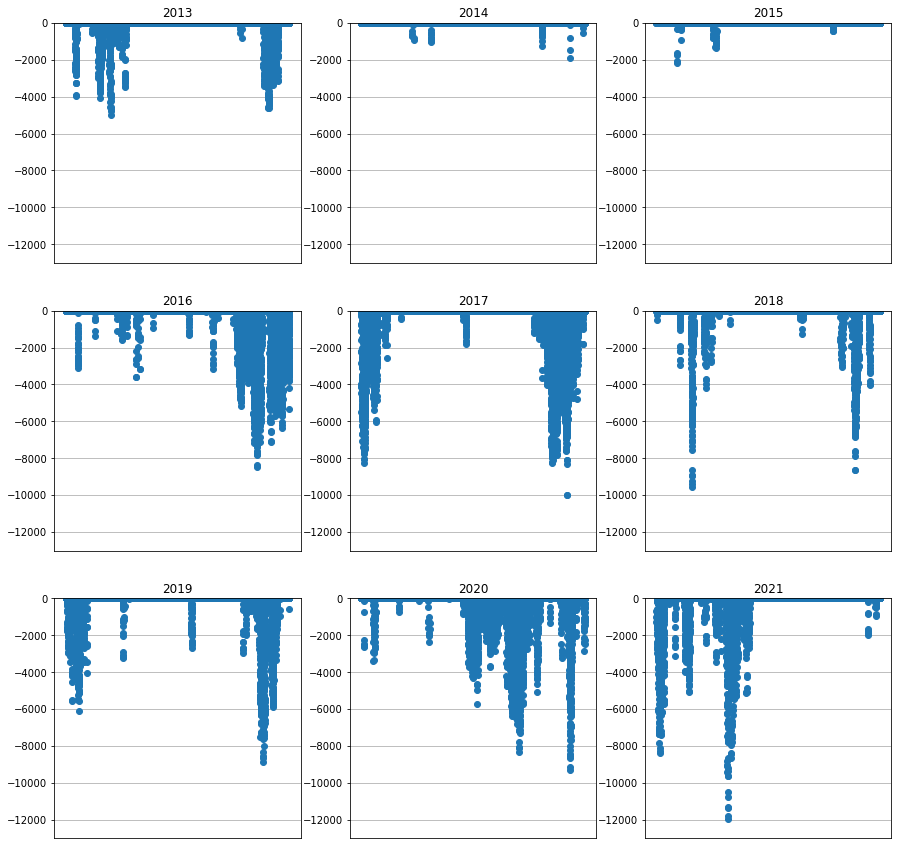

In [27]:
plt.figure(figsize = (15,15))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.grid()
    plt.title(2013+i)
    plt.xticks([])
    plt.ylim([-13000, 0])
    plt.plot_date(black_out['Date - Heure'][black_out['An']==2013+i], black_out['balance'][black_out['An']==2013+i])
    plt.savefig('./png/viz_historique_balance_negative.png');

Les graphiques ci-dessus indique pour chaque année les périodes pour lesquelles la puissance fournie par la production est inférieure à la puissance demandée par la consommation.

On note que depuis l'hiver 2016, la France perd significativement de son autonomie énergétique. Elle était quasi totale en 2014 et 2015.

Pour compenser ces déficits, le recours à l'énergie étrangère est principalement effectué pendant les périodes d'hiver.

Depuis mi 2020, on observe une dépendance plus forte et plus régulière tout au long de l'année. C'est cohérent avec la baisse de la fourniture d'énergie nucléaire observée plus haut.

Quelques recherches sur Internet concernant l'énergie nucléaire :
1. En France, 56 réacteurs sur 18 centrales (32 de 900 MW, 20 de 1300 MW et 4 de 1450 MW).
2. La majorité ont été mis en service entre 1977 et 1992.
3. Les centrales ont été conçues pour fonctionner au moins 30 ans.
4. En 2009, EDF a exprimé le souhait d'exploiter les réacteurs au-delà de 40 ans.
5. EDF doit obtenir les autorisations de prolongation auprès de l'Autorité de Sureté Nucléaire (ASN).
6. Suite à l'accident de Fukushima, il est demandé de faire évoluer la sûreté vers celle des EPR (~55 Milliards d'Euros).
7. La loi énergie-climat prévoit de faire baisser la part du nucléaire dans le mix français à 50%.
8. Le plan publié en Avril 2020 prévoit l'arrêt de 14 réacteurs d'ici à 2035.
9. **2 premiers réacteurs ont été arrêtés définitivement en Février et Juin 2020 (Fessenheim)**.
10. Arrêt de tranche : arrêt de fonctionnement pour recharge de combustible pendant 1 mois tous les 12 ou 18 mois, intercalés avec arrêt pour opérations de maintenance pendant 2 mois. Autres arrêts pour les visites décénnales.
11. En octobre 2021, lors de la visite décennale sur le réacteur 1 de la centrale de Civaux, des anomalies ont été détectées. Aussitôt le 2ème réacteur du site a été arrêté. Les 2 réacteurs de Chooz, de même génération, sont arrêtés en décembre. Ce sont **les 4 plus gros réacteurs (1450 MW) qui sont à l'arrêt**.

NB : arrêts de tranche : https://www.asn.fr/l-asn-controle/actualites-du-controle/installations-nucleaires/arret-de-reacteurs-de-centrales-nucleaires

### Etude par région

In [32]:
region = energy.groupby(['Région', 'Date', 'An', 'Mois', 'Jour']).mean()
region = region.reset_index()
region.head(1)

Région        Date    An  Mois  Jour  Consommation (MW)  \
0  Auvergne-Rhône-Alpes  2013-01-01  2013     1     1        7560.829787   

   Thermique (MW)  Nucléaire (MW)  Eolien (MW)  Solaire (MW)  \
0      251.510638    11577.021277   118.893617      5.021277   

   Hydraulique (MW)  Pompage (MW)  Bioénergies (MW)  Ech. physiques (MW)  \
0       2743.914894        -755.0         64.914894         -6449.340426   

   Conso hors Pompage  Hydr hors Pompage  Renouvelable Totale  \
0         6805.829787        1988.914894          2932.744681   

   Ren Totale hors Pompage   Prod Totale  Prod Totale hors Pompage  
0              2177.744681  14761.276596              14006.276596

In [33]:
regions = region['Région'].unique()
regions = regions.tolist()
regions

['Auvergne-Rhône-Alpes',
 'Bourgogne-Franche-Comté',
 'Bretagne',
 'Centre-Val de Loire',
 'Grand Est',
 'Hauts-de-France',
 'Normandie',
 'Nouvelle-Aquitaine',
 'Occitanie',
 'Pays de la Loire',
 "Provence-Alpes-Côte d'Azur",
 'Île-de-France']

In [34]:
id_regions = ['ARA',
             'BFC',
             'B',
             'CVL',
             'GE',
             'HF',
             'N',
             'NelleA',
             'O',
             'PL',
             'PACA',
             'IDF']

In [35]:
region['id_region'] = region['Région']
region['id_region'].replace(to_replace = regions, value = id_regions, inplace = True)
region.head(1)

Région        Date    An  Mois  Jour  Consommation (MW)  \
0  Auvergne-Rhône-Alpes  2013-01-01  2013     1     1        7560.829787   

   Thermique (MW)  Nucléaire (MW)  Eolien (MW)  Solaire (MW)  ...  \
0      251.510638    11577.021277   118.893617      5.021277  ...   

   Pompage (MW)  Bioénergies (MW)  Ech. physiques (MW)  Conso hors Pompage  \
0        -755.0         64.914894         -6449.340426         6805.829787   

   Hydr hors Pompage  Renouvelable Totale  Ren Totale hors Pompage  \
0        1988.914894          2932.744681              2177.744681   

    Prod Totale  Prod Totale hors Pompage  id_region  
0  14761.276596              14006.276596        ARA  

[1 rows x 21 columns]

<ipython-input-36-1f6e7f92747e>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)
<ipython-input-36-1f6e7f92747e>:22: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 2)


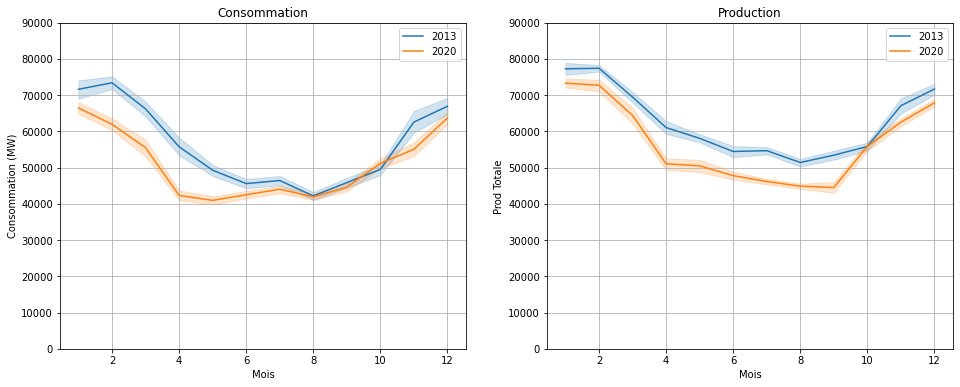

In [36]:
plt.figure(figsize=(16, 6))

annee = 2013

plt.subplot(1, 2, 1)
plt.title('Consommation')
plt.ylim([0, 90000])
plt.grid()
sns.lineplot(data=df[df['An']==annee], x='Mois', y='Consommation (MW)', label=str(annee))

plt.subplot(1, 2, 2)
plt.title('Production')
plt.ylim([0, 90000])
plt.grid()
sns.lineplot(data=df[df['An']==annee], x='Mois', y='Prod Totale', label=str(annee))

annee = 2020

plt.subplot(1, 2, 1)
sns.lineplot(data=df[df['An']==annee], x='Mois', y='Consommation (MW)', label=str(annee))

plt.subplot(1, 2, 2)
sns.lineplot(data=df[df['An']==annee], x='Mois', y='Prod Totale', label=str(annee));

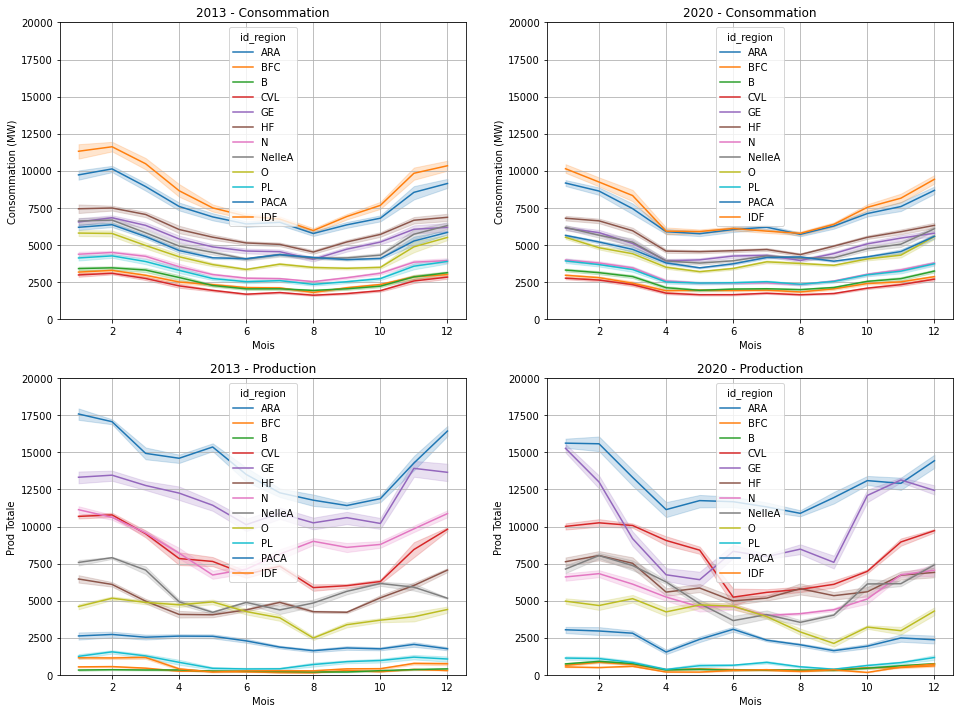

In [37]:
plt.figure(figsize=(16, 12))

annee = 2013

plt.subplot(2, 2, 1)
plt.title(str(annee) +' - Consommation')
plt.ylim([0, 20000])
plt.grid()
sns.lineplot(data=region[region['An']==annee], x='Mois', y='Consommation (MW)', hue='id_region', palette='tab10')

plt.subplot(2, 2, 3)
plt.title(str(annee) +' - Production')
plt.ylim([0, 20000])
plt.grid()
sns.lineplot(data=region[region['An']==annee], x='Mois', y='Prod Totale', hue='id_region', palette='tab10')

annee = 2020

plt.subplot(2, 2, 2)
plt.title(str(annee) +' - Consommation')
plt.ylim([0, 20000])
plt.grid()
sns.lineplot(data=region[region['An']==annee], x='Mois', y='Consommation (MW)', hue='id_region', palette='tab10')

plt.subplot(2, 2, 4)
plt.title(str(annee) +' - Production')
plt.ylim([0, 20000])
plt.grid()
sns.lineplot(data=region[region['An']==annee], x='Mois', y='Prod Totale', hue='id_region', palette='tab10');

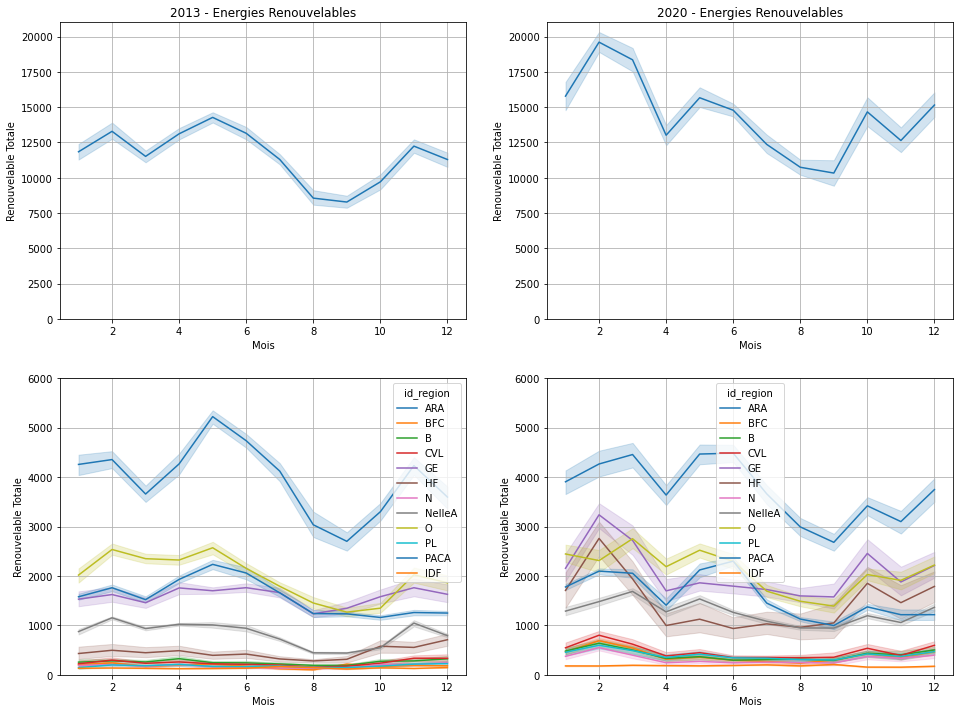

In [38]:
plt.figure(figsize=(16, 12))

annee = 2013

plt.subplot(2, 2, 1)
plt.title(str(annee) +' - Energies Renouvelables')
plt.ylim([0, 21000])
plt.grid()
sns.lineplot(data=df[df['An']==annee], x='Mois', y='Renouvelable Totale')

plt.subplot(2, 2, 3)
plt.ylim([0, 6000])
plt.grid()
sns.lineplot(data=region[region['An']==annee], x='Mois', y='Renouvelable Totale', hue='id_region', palette='tab10')

annee = 2020

plt.subplot(2, 2, 2)
plt.title(str(annee) +' - Energies Renouvelables')
plt.ylim([0, 21000])
plt.grid()
sns.lineplot(data=df[df['An']==annee], x='Mois', y='Renouvelable Totale')

plt.subplot(2, 2, 4)
plt.ylim([0, 6000])
plt.grid()
sns.lineplot(data=region[region['An']==annee], x='Mois', y='Renouvelable Totale', hue='id_region', palette='tab10');

Les énergies renouvelables se sont développées de 30% environ entre 2013 et 2020.

L'énergie hydraulique, principale source d'énergie renouvelable est en net recul (de 35% à 15%), signifiant le développement important des nouvelles énergies.

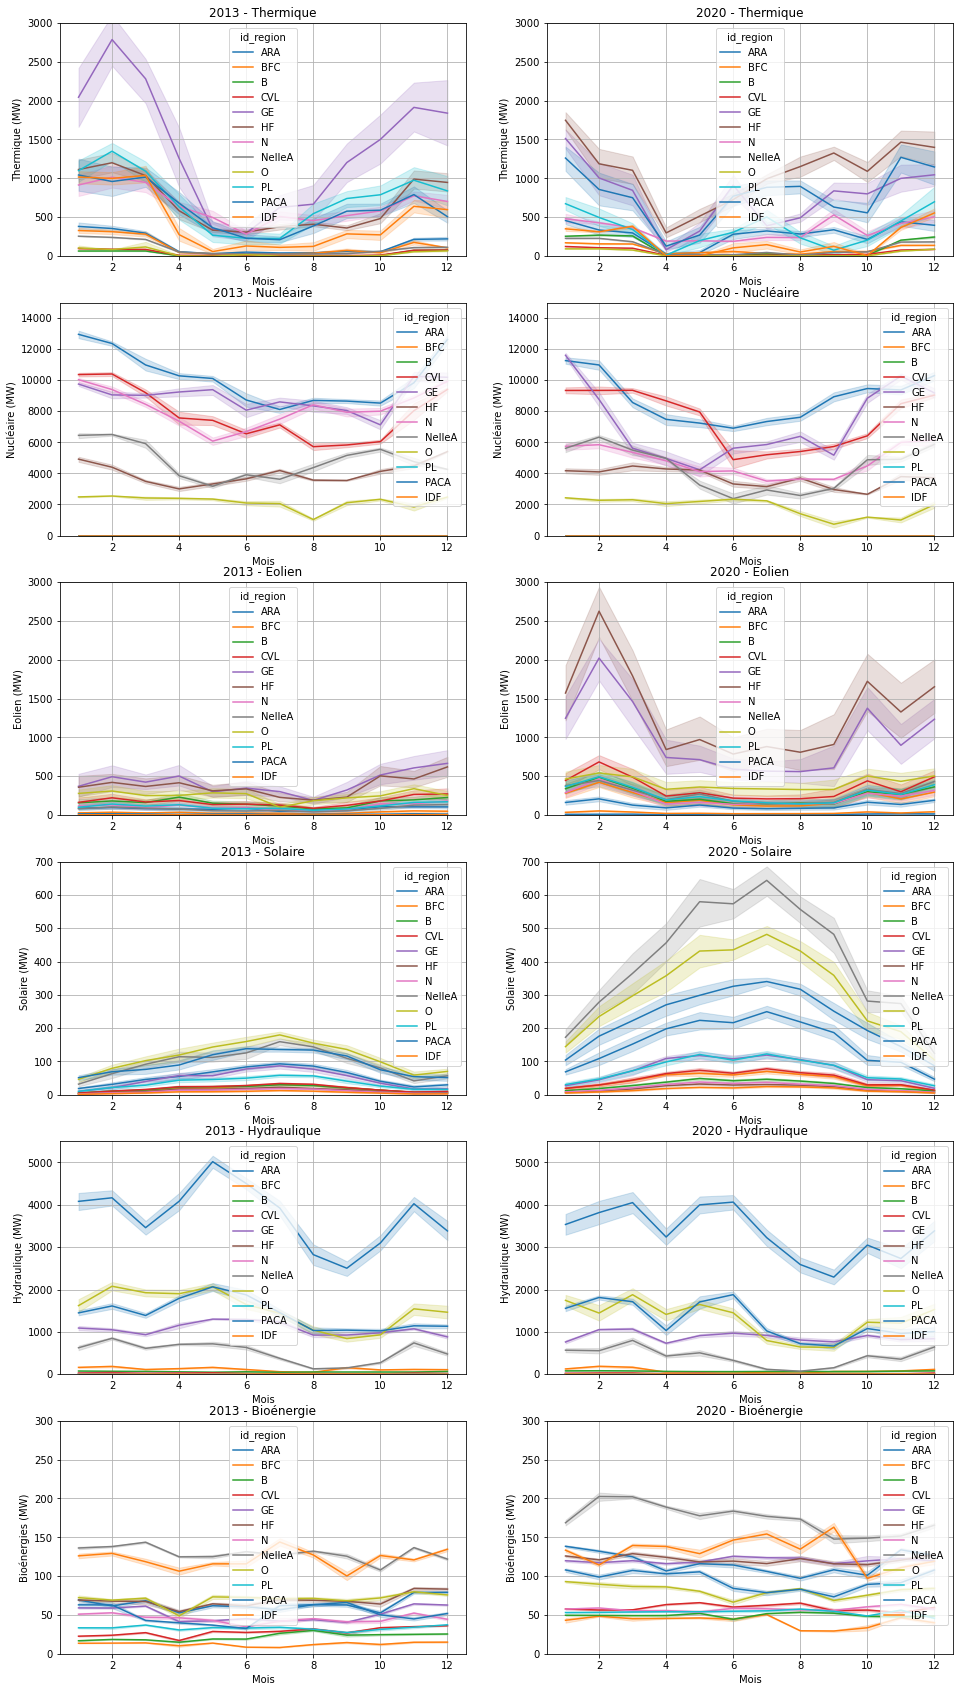

In [39]:
plt.figure(figsize=(16, 30))

annee = 2013

plt.subplot(6, 2, 1)
plt.title(str(annee) +' - Thermique')
plt.ylim([0, 3000])
plt.grid()
sns.lineplot(data=region[region['An']==annee], x='Mois', y='Thermique (MW)', hue='id_region', palette='tab10')
plt.subplot(6, 2, 3)
plt.title(str(annee) +' - Nucléaire')
plt.ylim([0, 15000])
plt.grid()
sns.lineplot(data=region[region['An']==annee], x='Mois', y='Nucléaire (MW)', hue='id_region', palette='tab10')
plt.subplot(6, 2, 5)
plt.title(str(annee) +' - Eolien')
plt.ylim([0, 3000])
plt.grid()
sns.lineplot(data=region[region['An']==annee], x='Mois', y='Eolien (MW)', hue='id_region', palette='tab10')
plt.subplot(6, 2, 7)
plt.title(str(annee) +' - Solaire')
plt.ylim([0, 700])
plt.grid()
sns.lineplot(data=region[region['An']==annee], x='Mois', y='Solaire (MW)', hue='id_region', palette='tab10')
plt.subplot(6, 2, 9)
plt.title(str(annee) +' - Hydraulique')
plt.ylim([0, 5500])
plt.grid()
sns.lineplot(data=region[region['An']==annee], x='Mois', y='Hydraulique (MW)', hue='id_region', palette='tab10')
plt.subplot(6, 2, 11)
plt.title(str(annee) +' - Bioénergie')
plt.ylim([0, 300])
plt.grid()
sns.lineplot(data=region[region['An']==annee], x='Mois', y='Bioénergies (MW)', hue='id_region', palette='tab10')

annee = 2020

plt.subplot(6, 2, 2)
plt.title(str(annee) +' - Thermique')
plt.ylim([0, 3000])
plt.grid()
sns.lineplot(data=region[region['An']==annee], x='Mois', y='Thermique (MW)', hue='id_region', palette='tab10')
plt.subplot(6, 2, 4)
plt.title(str(annee) +' - Nucléaire')
plt.ylim([0, 15000])
plt.grid()
sns.lineplot(data=region[region['An']==annee], x='Mois', y='Nucléaire (MW)', hue='id_region', palette='tab10')
plt.subplot(6, 2, 6)
plt.title(str(annee) +' - Eolien')
plt.ylim([0, 3000])
plt.grid()
sns.lineplot(data=region[region['An']==annee], x='Mois', y='Eolien (MW)', hue='id_region', palette='tab10')
plt.subplot(6, 2, 8)
plt.title(str(annee) +' - Solaire')
plt.ylim([0, 700])
plt.grid()
sns.lineplot(data=region[region['An']==annee], x='Mois', y='Solaire (MW)', hue='id_region', palette='tab10')
plt.subplot(6, 2, 10)
plt.title(str(annee) +' - Hydraulique')
plt.ylim([0, 5500])
plt.grid()
sns.lineplot(data=region[region['An']==annee], x='Mois', y='Hydraulique (MW)', hue='id_region', palette='tab10')
plt.subplot(6, 2, 12)
plt.title(str(annee) +' - Bioénergie')
plt.ylim([0, 300])
plt.grid()
sns.lineplot(data=region[region['An']==annee], x='Mois', y='Bioénergies (MW)', hue='id_region', palette='tab10');

In [40]:
legende_region = region[(region['An']==2020)&(region['Mois']==12)]
legende_region.groupby('id_region').mean()[['Thermique (MW)', 'Nucléaire (MW)', 'Eolien (MW)', 'Solaire (MW)',
       'Hydraulique (MW)', 'Bioénergies (MW)']]

Thermique (MW)  Nucléaire (MW)  Eolien (MW)  Solaire (MW)  \
id_region                                                              
ARA            394.895161    10296.671371   190.581989     46.583333   
B              243.622984        0.000000   363.013441     11.392473   
BFC            137.051075        0.000000   295.724462     12.581317   
CVL             85.633737     9040.948925   493.177419     13.588038   
GE            1045.412634     9181.005376  1235.024866     19.094086   
HF            1398.530914     3719.553763  1652.630376      6.803763   
IDF            554.086022        0.000000    43.387769      5.063844   
N              504.036290     6150.834677   317.339382      6.982527   
NelleA         181.323925     5870.233199   433.075941    124.029570   
O               87.133065     1994.602823   504.954973    104.079973   
PACA          1145.892473        0.000000    15.125672     86.786962   
PL             697.926747        0.000000   391.104839     26.719758   

           Hydraulique (MW)  Bioénergies (MW)  
id_region                                      
ARA             3384.502016        126.364919  
B                 80.095430         48.721774  
BFC              114.698253         39.912634  
CVL               30.093414         59.736559  
GE               838.852823        119.601478  
HF                 1.458333        127.731183  
IDF                5.514785        119.200269  
N                 15.317204         57.627016  
NelleA           643.306452        165.635753  
O               1527.631048         84.193548  
PACA            1006.823925        107.872984  
PL                 4.450941         45.816532

On constate **l'arrêt des centrales à charbon (énergie thermique)**. Il n'en reste que 3 en 2020. On note notamment les 1250 MW stoppés dans le Grand Est en 2013, 2014 et 2015. NB : Emmanuel Macron s'était engagé à arrêter cette filière pendant son quinquenat. La dernière s'arrêtera entre 2024 et 2026.

Concernant le nucléaire, l'arrêt de Fessenheim en 2020 n'est pas très visible. En revanche, on note une importante perte de capacité en Normandie.

**L'éolien se démarque dans le Grand Est et dans les Hauts de France** où les capacités se sont développées plus qu'ailleurs en France.

**Les capacités d'énergie solaire ont significativement augmenté dans la moitié sud de la France**, avec une différence marquée également entre l'ouest et l'est.

**L'énergie hydraulique est relativement stable** avec la région AURA qui fournit logiquement plus de 50% de la capacité nationale. Cette région bénéficie des sommets enneigés avec la fonte des neiges, des possibilités d'implantation de barages, des opportunités d'implanter des STEP avec de fortes dénivellations.

En 2013, l'IDF et **la Nouvelle Aquitaine étaient en avance sur les autres régions** pour ce qui concerne les bioénergies. En 2020, l'IDF n'a pas augmenté sa capacité alors que la Nouvelle Aquitaine a continuer à progresser pour se démarquer seule sur cette filière d'énergie. L'IDF a été rejointe et dépassée par AURA, PACA, Hauts de France, Grand Est. Bien que toutes les régions aient développé cette source d'énergie, les autres restent en retrait.

### Evolution de chaque source d'énergie pour chaque région

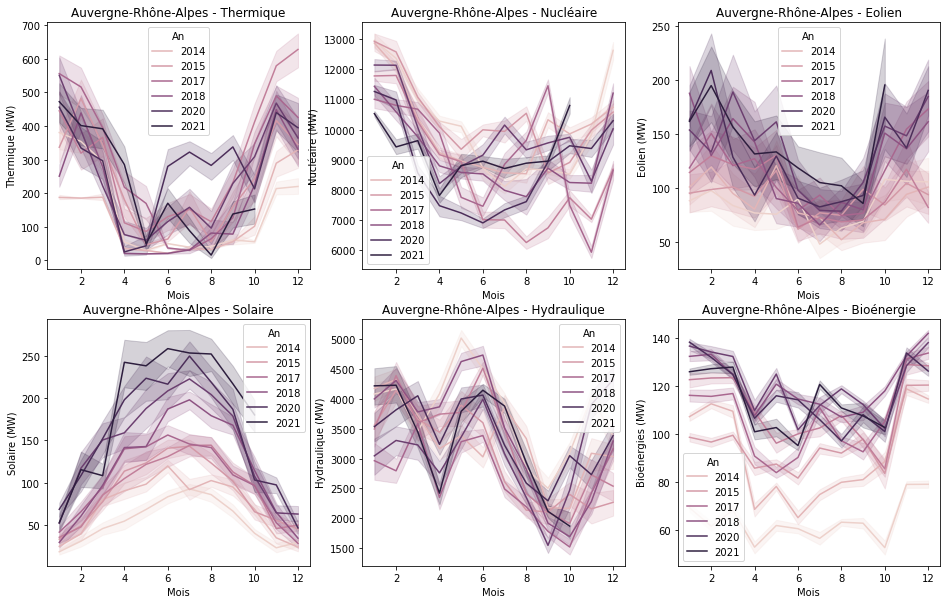

In [41]:
reg = regions[0] # changer la valeur de l'index de 0 à 11 pour visualiser les caractéristiques par région

plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
plt.title(reg + ' - Thermique')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Thermique (MW)', hue='An')
plt.subplot(2, 3, 2)
plt.title(reg + ' - Nucléaire')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Nucléaire (MW)', hue='An')
plt.subplot(2, 3, 3)
plt.title(reg + ' - Eolien')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Eolien (MW)', hue='An')
plt.subplot(2, 3, 4)
plt.title(reg + ' - Solaire')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Solaire (MW)', hue='An')
plt.subplot(2, 3, 5)
plt.title(reg + ' - Hydraulique')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Hydraulique (MW)', hue='An')
plt.subplot(2, 3, 6)
plt.title(reg + ' - Bioénergie')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Bioénergies (MW)', hue='An');

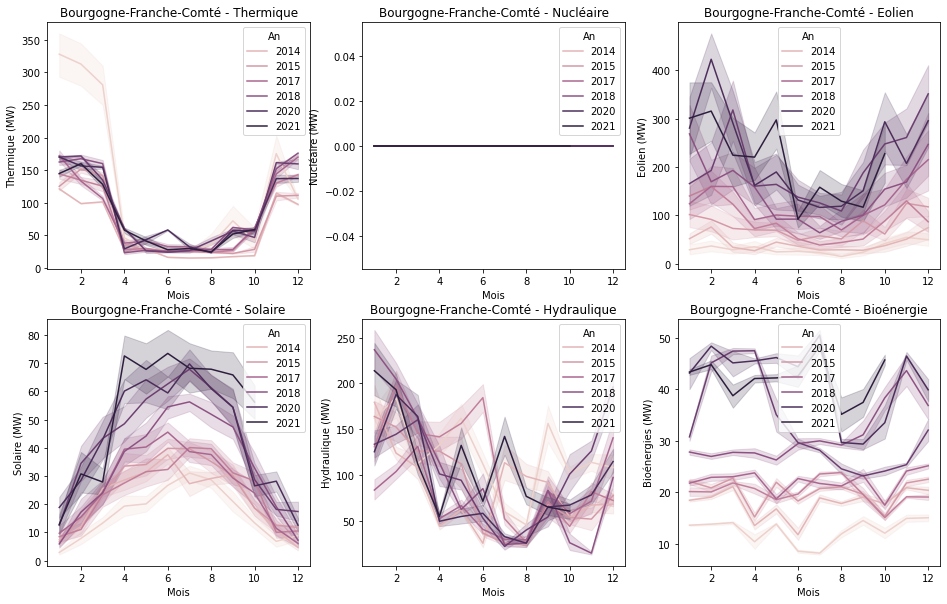

In [42]:
reg = regions[1] # changer la valeur de l'index de 0 à 11 pour visualiser les caractéristiques par région

plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
plt.title(reg + ' - Thermique')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Thermique (MW)', hue='An')
plt.subplot(2, 3, 2)
plt.title(reg + ' - Nucléaire')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Nucléaire (MW)', hue='An')
plt.subplot(2, 3, 3)
plt.title(reg + ' - Eolien')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Eolien (MW)', hue='An')
plt.subplot(2, 3, 4)
plt.title(reg + ' - Solaire')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Solaire (MW)', hue='An')
plt.subplot(2, 3, 5)
plt.title(reg + ' - Hydraulique')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Hydraulique (MW)', hue='An')
plt.subplot(2, 3, 6)
plt.title(reg + ' - Bioénergie')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Bioénergies (MW)', hue='An');

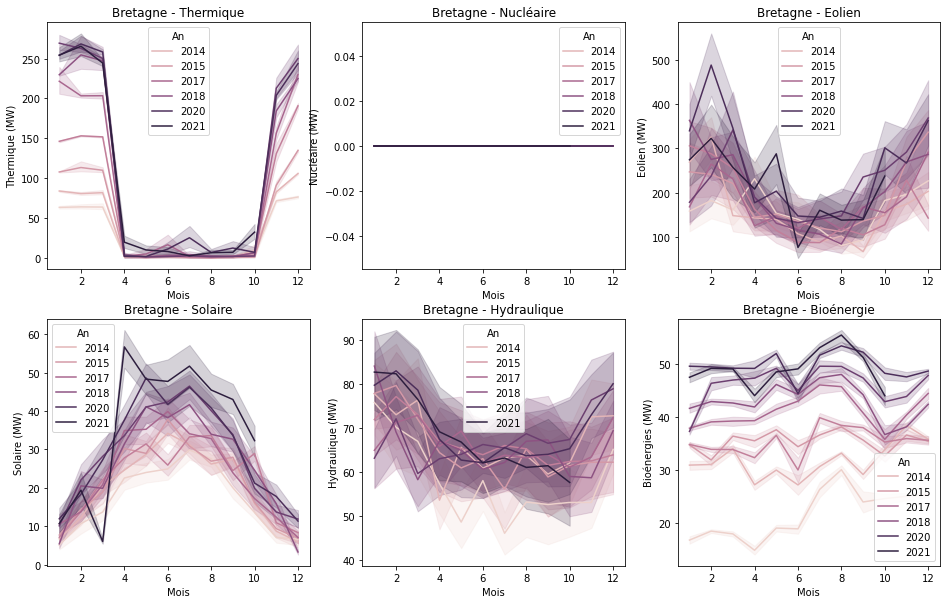

In [43]:
reg = regions[2] # changer la valeur de l'index de 0 à 11 pour visualiser les caractéristiques par région

plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
plt.title(reg + ' - Thermique')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Thermique (MW)', hue='An')
plt.subplot(2, 3, 2)
plt.title(reg + ' - Nucléaire')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Nucléaire (MW)', hue='An')
plt.subplot(2, 3, 3)
plt.title(reg + ' - Eolien')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Eolien (MW)', hue='An')
plt.subplot(2, 3, 4)
plt.title(reg + ' - Solaire')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Solaire (MW)', hue='An')
plt.subplot(2, 3, 5)
plt.title(reg + ' - Hydraulique')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Hydraulique (MW)', hue='An')
plt.subplot(2, 3, 6)
plt.title(reg + ' - Bioénergie')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Bioénergies (MW)', hue='An');

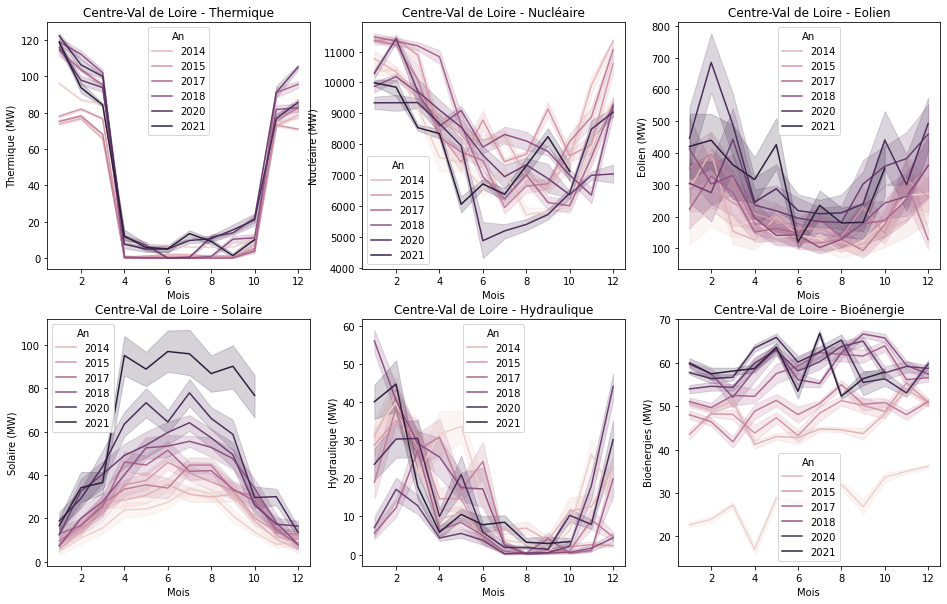

In [44]:
reg = regions[3] # changer la valeur de l'index de 0 à 11 pour visualiser les caractéristiques par région

plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
plt.title(reg + ' - Thermique')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Thermique (MW)', hue='An')
plt.subplot(2, 3, 2)
plt.title(reg + ' - Nucléaire')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Nucléaire (MW)', hue='An')
plt.subplot(2, 3, 3)
plt.title(reg + ' - Eolien')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Eolien (MW)', hue='An')
plt.subplot(2, 3, 4)
plt.title(reg + ' - Solaire')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Solaire (MW)', hue='An')
plt.subplot(2, 3, 5)
plt.title(reg + ' - Hydraulique')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Hydraulique (MW)', hue='An')
plt.subplot(2, 3, 6)
plt.title(reg + ' - Bioénergie')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Bioénergies (MW)', hue='An');

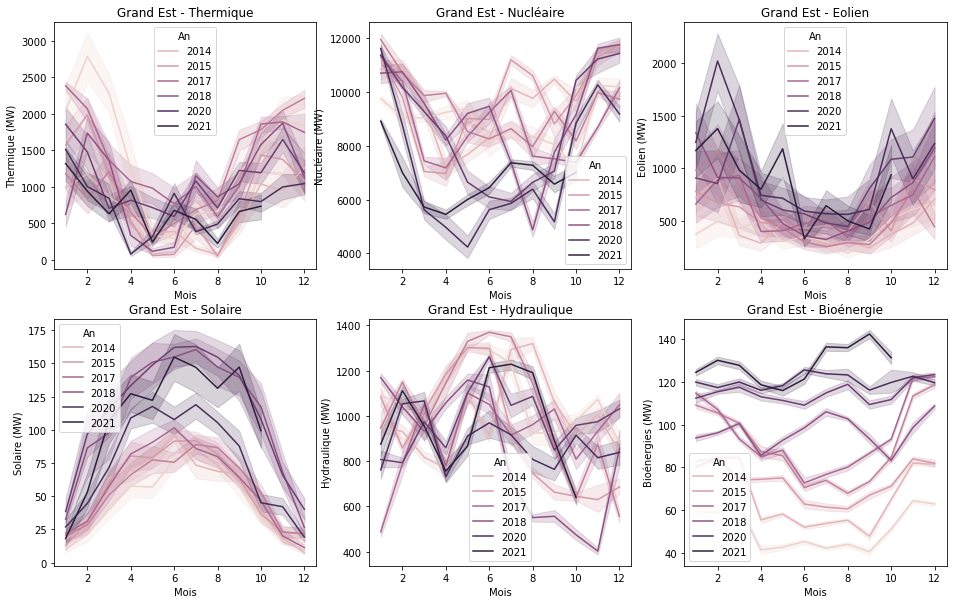

In [45]:
reg = regions[4] # changer la valeur de l'index de 0 à 11 pour visualiser les caractéristiques par région

plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
plt.title(reg + ' - Thermique')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Thermique (MW)', hue='An')
plt.subplot(2, 3, 2)
plt.title(reg + ' - Nucléaire')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Nucléaire (MW)', hue='An')
plt.subplot(2, 3, 3)
plt.title(reg + ' - Eolien')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Eolien (MW)', hue='An')
plt.subplot(2, 3, 4)
plt.title(reg + ' - Solaire')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Solaire (MW)', hue='An')
plt.subplot(2, 3, 5)
plt.title(reg + ' - Hydraulique')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Hydraulique (MW)', hue='An')
plt.subplot(2, 3, 6)
plt.title(reg + ' - Bioénergie')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Bioénergies (MW)', hue='An');

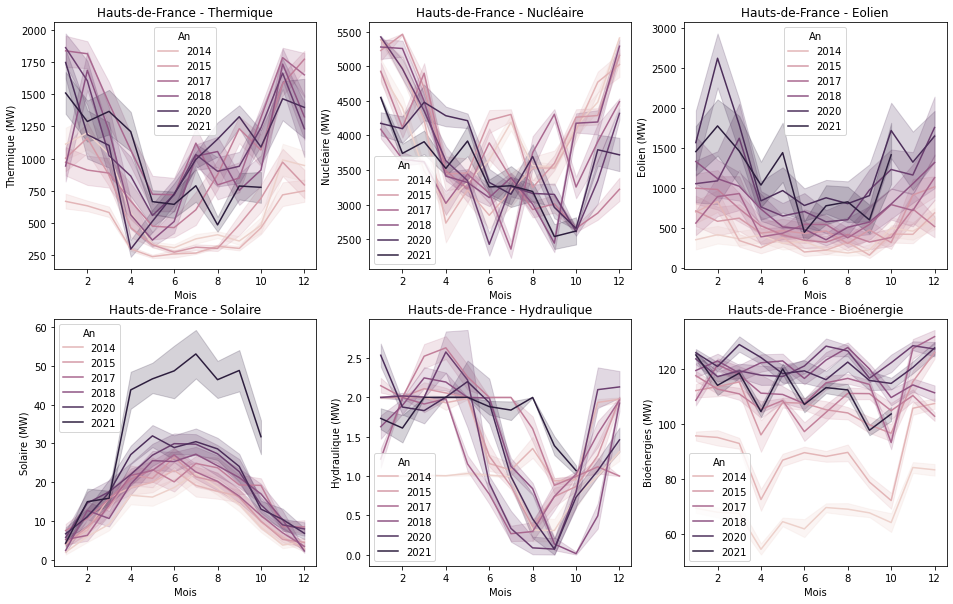

In [46]:
reg = regions[5] # changer la valeur de l'index de 0 à 11 pour visualiser les caractéristiques par région

plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
plt.title(reg + ' - Thermique')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Thermique (MW)', hue='An')
plt.subplot(2, 3, 2)
plt.title(reg + ' - Nucléaire')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Nucléaire (MW)', hue='An')
plt.subplot(2, 3, 3)
plt.title(reg + ' - Eolien')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Eolien (MW)', hue='An')
plt.subplot(2, 3, 4)
plt.title(reg + ' - Solaire')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Solaire (MW)', hue='An')
plt.subplot(2, 3, 5)
plt.title(reg + ' - Hydraulique')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Hydraulique (MW)', hue='An')
plt.subplot(2, 3, 6)
plt.title(reg + ' - Bioénergie')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Bioénergies (MW)', hue='An');

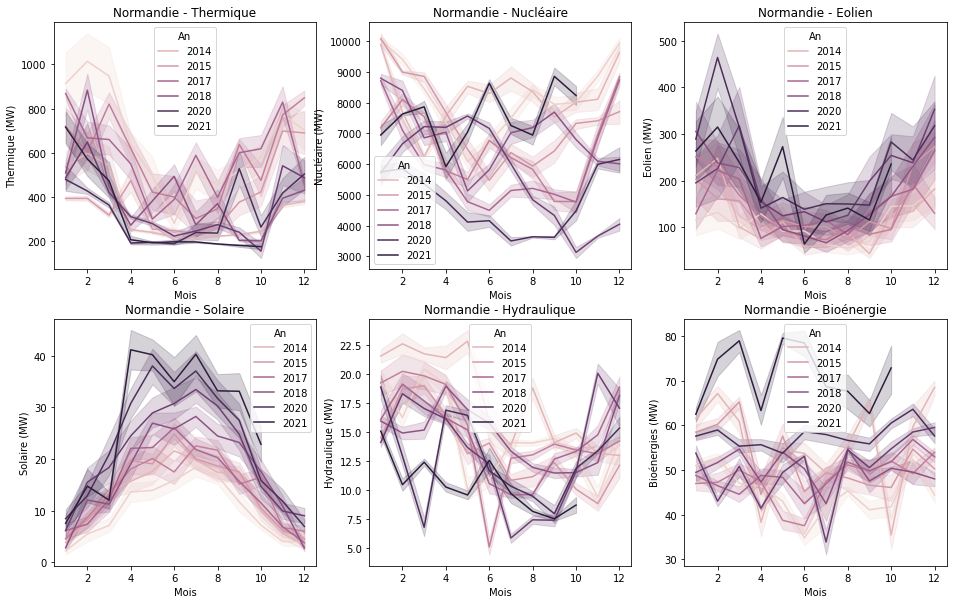

In [47]:
reg = regions[6] # changer la valeur de l'index de 0 à 11 pour visualiser les caractéristiques par région

plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
plt.title(reg + ' - Thermique')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Thermique (MW)', hue='An')
plt.subplot(2, 3, 2)
plt.title(reg + ' - Nucléaire')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Nucléaire (MW)', hue='An')
plt.subplot(2, 3, 3)
plt.title(reg + ' - Eolien')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Eolien (MW)', hue='An')
plt.subplot(2, 3, 4)
plt.title(reg + ' - Solaire')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Solaire (MW)', hue='An')
plt.subplot(2, 3, 5)
plt.title(reg + ' - Hydraulique')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Hydraulique (MW)', hue='An')
plt.subplot(2, 3, 6)
plt.title(reg + ' - Bioénergie')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Bioénergies (MW)', hue='An');

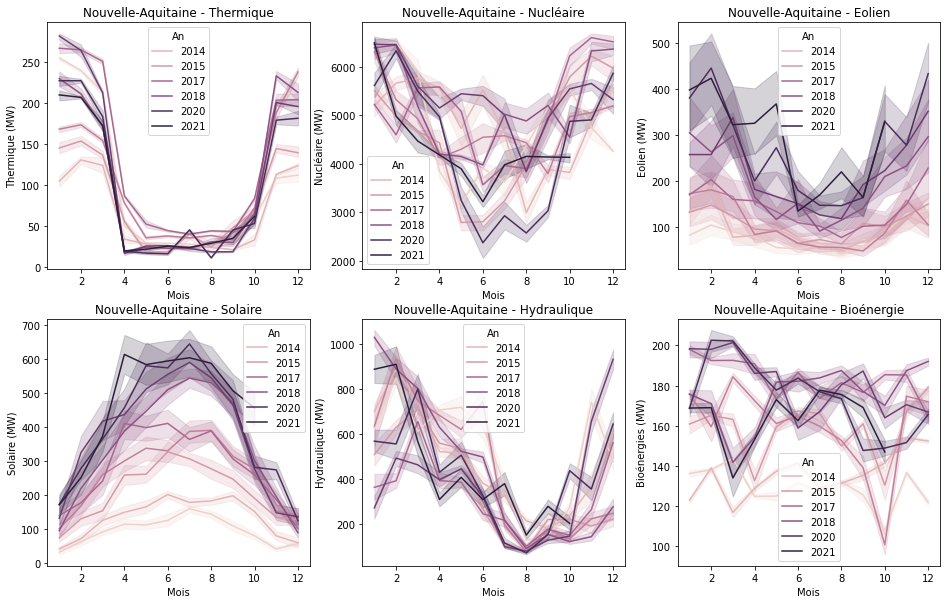

In [48]:
reg = regions[7] # changer la valeur de l'index de 0 à 11 pour visualiser les caractéristiques par région

plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
plt.title(reg + ' - Thermique')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Thermique (MW)', hue='An')
plt.subplot(2, 3, 2)
plt.title(reg + ' - Nucléaire')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Nucléaire (MW)', hue='An')
plt.subplot(2, 3, 3)
plt.title(reg + ' - Eolien')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Eolien (MW)', hue='An')
plt.subplot(2, 3, 4)
plt.title(reg + ' - Solaire')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Solaire (MW)', hue='An')
plt.subplot(2, 3, 5)
plt.title(reg + ' - Hydraulique')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Hydraulique (MW)', hue='An')
plt.subplot(2, 3, 6)
plt.title(reg + ' - Bioénergie')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Bioénergies (MW)', hue='An');

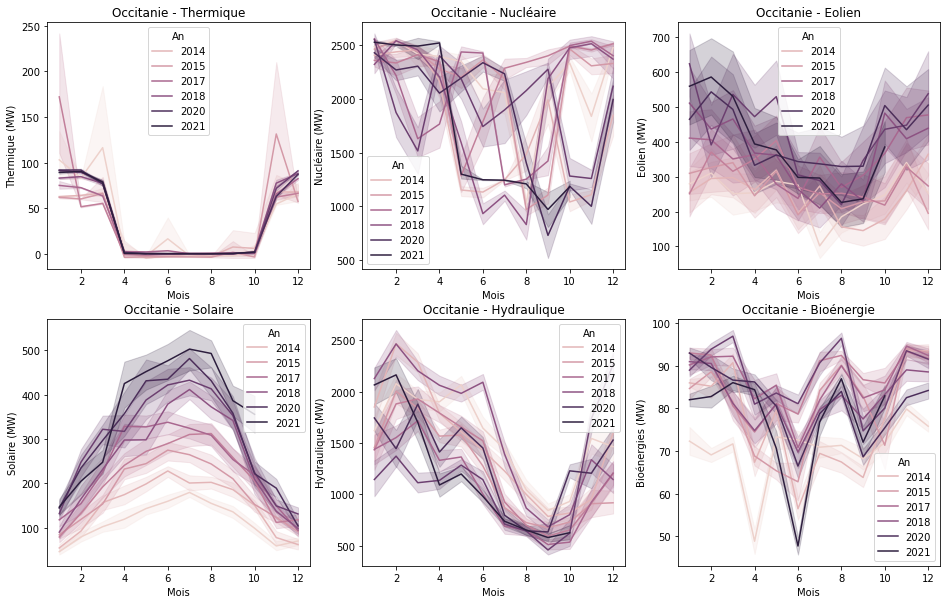

In [49]:
reg = regions[8] # changer la valeur de l'index de 0 à 11 pour visualiser les caractéristiques par région

plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
plt.title(reg + ' - Thermique')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Thermique (MW)', hue='An')
plt.subplot(2, 3, 2)
plt.title(reg + ' - Nucléaire')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Nucléaire (MW)', hue='An')
plt.subplot(2, 3, 3)
plt.title(reg + ' - Eolien')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Eolien (MW)', hue='An')
plt.subplot(2, 3, 4)
plt.title(reg + ' - Solaire')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Solaire (MW)', hue='An')
plt.subplot(2, 3, 5)
plt.title(reg + ' - Hydraulique')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Hydraulique (MW)', hue='An')
plt.subplot(2, 3, 6)
plt.title(reg + ' - Bioénergie')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Bioénergies (MW)', hue='An');

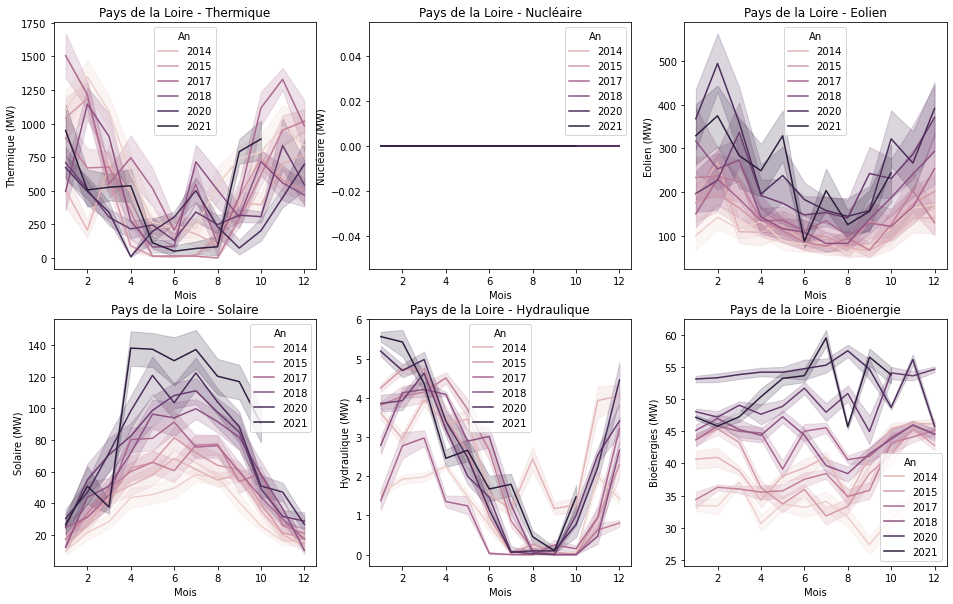

In [50]:
reg = regions[9] # changer la valeur de l'index de 0 à 11 pour visualiser les caractéristiques par région

plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
plt.title(reg + ' - Thermique')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Thermique (MW)', hue='An')
plt.subplot(2, 3, 2)
plt.title(reg + ' - Nucléaire')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Nucléaire (MW)', hue='An')
plt.subplot(2, 3, 3)
plt.title(reg + ' - Eolien')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Eolien (MW)', hue='An')
plt.subplot(2, 3, 4)
plt.title(reg + ' - Solaire')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Solaire (MW)', hue='An')
plt.subplot(2, 3, 5)
plt.title(reg + ' - Hydraulique')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Hydraulique (MW)', hue='An')
plt.subplot(2, 3, 6)
plt.title(reg + ' - Bioénergie')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Bioénergies (MW)', hue='An');

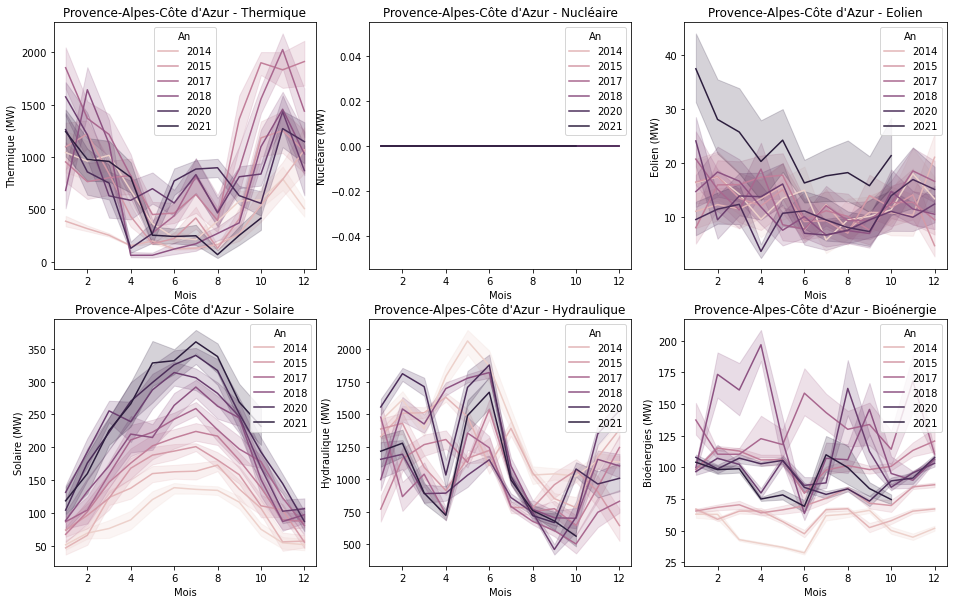

In [51]:
reg = regions[10] # changer la valeur de l'index de 0 à 11 pour visualiser les caractéristiques par région

plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
plt.title(reg + ' - Thermique')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Thermique (MW)', hue='An')
plt.subplot(2, 3, 2)
plt.title(reg + ' - Nucléaire')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Nucléaire (MW)', hue='An')
plt.subplot(2, 3, 3)
plt.title(reg + ' - Eolien')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Eolien (MW)', hue='An')
plt.subplot(2, 3, 4)
plt.title(reg + ' - Solaire')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Solaire (MW)', hue='An')
plt.subplot(2, 3, 5)
plt.title(reg + ' - Hydraulique')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Hydraulique (MW)', hue='An')
plt.subplot(2, 3, 6)
plt.title(reg + ' - Bioénergie')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Bioénergies (MW)', hue='An');

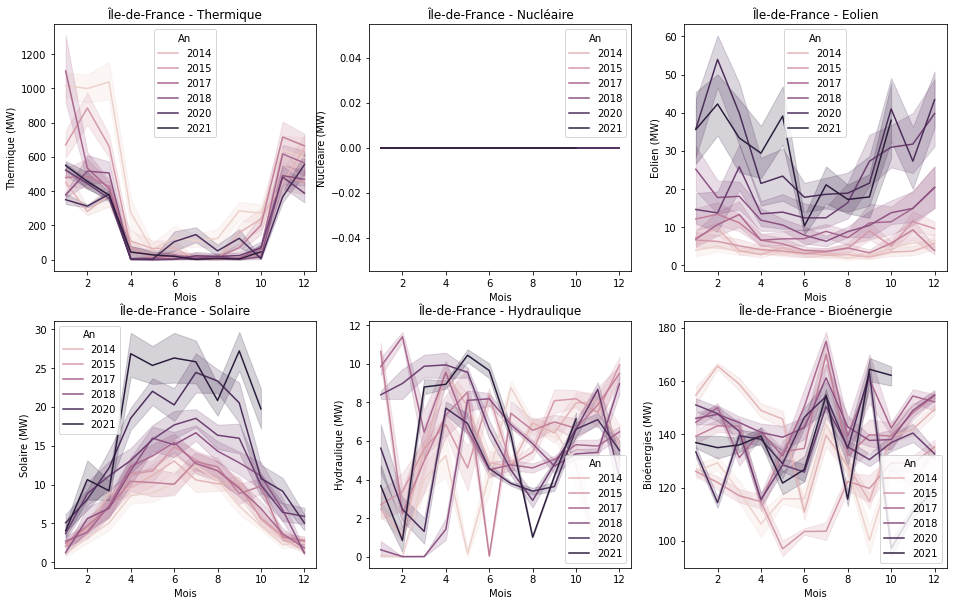

In [52]:
reg = regions[11] # changer la valeur de l'index de 0 à 11 pour visualiser les caractéristiques par région

plt.figure(figsize=(16, 10))

plt.subplot(2, 3, 1)
plt.title(reg + ' - Thermique')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Thermique (MW)', hue='An')
plt.subplot(2, 3, 2)
plt.title(reg + ' - Nucléaire')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Nucléaire (MW)', hue='An')
plt.subplot(2, 3, 3)
plt.title(reg + ' - Eolien')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Eolien (MW)', hue='An')
plt.subplot(2, 3, 4)
plt.title(reg + ' - Solaire')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Solaire (MW)', hue='An')
plt.subplot(2, 3, 5)
plt.title(reg + ' - Hydraulique')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Hydraulique (MW)', hue='An')
plt.subplot(2, 3, 6)
plt.title(reg + ' - Bioénergie')
sns.lineplot(data=region[region['Région']==reg], x='Mois', y='Bioénergies (MW)', hue='An');